### UNDERSTANDING LONG SHORT TERM MEMORY (LSTM)

In [1]:
#imports

#keras imports
from keras.models import Sequential, Model
from keras.layers import Embedding, SimpleRNN, Flatten, Input, Dense
from keras import layers
from keras.layers import LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.optimizers import RMSprop


# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np
import cv2

# utility functions
import os
import sys
%matplotlib inline
os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from utility.utils import utils
utility_obj = utils()

Using TensorFlow backend.


### Preparing data for model training

In [2]:
# pre-processing initializations
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# data pre-prcessing
### IMDB data encoding from text will be extensively covered in "text_pre-processing_basic_model_building"###


print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# cutting sentences to max length of 500
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print ("after data preprocessing")
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape, "\n")

print("\nImdb review 1 sample input data\n")
print(input_train[:1]) 

print("\nImdb review data lables")
print(y_train[:2])
print(
"""
Note:  
0 : "Negative review"
1 : "Positive review"
post_padding in input data helps gragient in LSTM flow better 
"""
)

Loading data...
after data preprocessing
input_train shape: (25000, 500)
input_test shape: (25000, 500) 


Imdb review 1 sample input data

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  

### TRAINING A MODEL USING LSTM LAYER

In [5]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 268s 13ms/step - loss: 0.5151 - acc: 0.7564 - val_loss: 0.4024 - val_acc: 0.8294
Epoch 2/10
20000/20000 [==============================] - 270s 14ms/step - loss: 0.3071 - acc: 0.8783 - val_loss: 0.4997 - val_acc: 0.8184
Epoch 3/10
20000/20000 [====================

### result

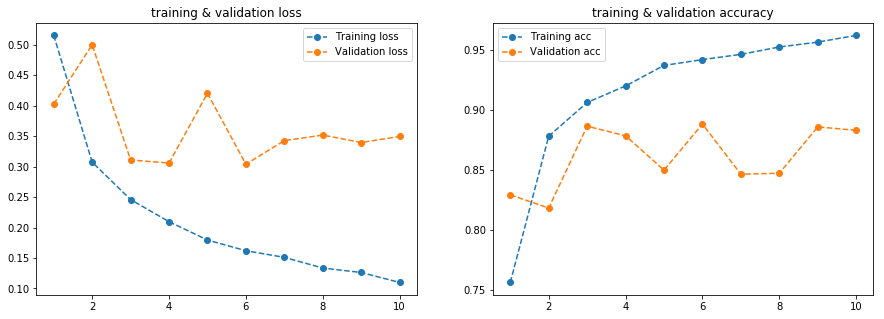

In [6]:
# ploting model training results
utility_obj.plot_training_history(history.history)

### UNDERSTANDING BIDIRECTIONAL RNNs

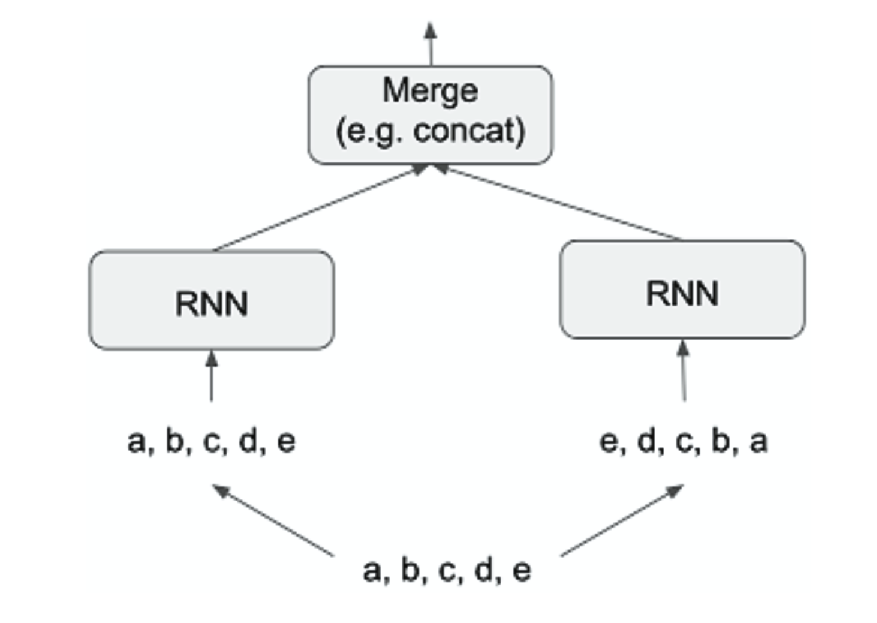

### reversing data for sequential model training


Undertanding the results, if the data is feed in reverse manner. 
Which is the second input in bi-directional RNN layer.

Data reversing
starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 259s 13ms/step - loss: 0.6931 - acc: 0.5070 - val_loss: 0.6933 - val_acc: 0.5042
Epoch 2/10
20000/20000 [=====================

In [3]:
utility_obj.plot_large_image_without_borders("./pics/bi-directional_rnn.png")
display(Markdown("### reversing data for sequential model training"))

print ("""
Undertanding the results, if the data is feed in reverse manner. 
Which is the second input in bi-directional RNN layer.
""")

print ("Data reversing")
# Reverse sequences
input_train_ = [x[::-1] for x in input_train]
input_test_ = [x[::-1] for x in input_test]

# Pad sequences
x_train_ = sequence.pad_sequences(input_train_, maxlen=maxlen)
x_test_ = sequence.pad_sequences(input_test_, maxlen=maxlen)

# model architecture and training
print("starting model training...")
model = Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.LSTM(64))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train_, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

### result

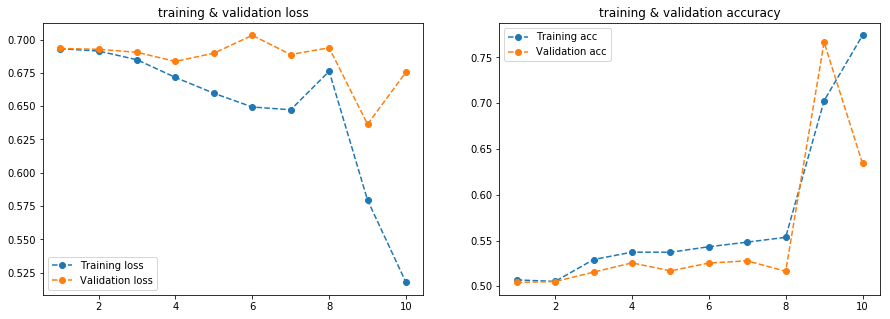

In [4]:
# ploting model training results
utility_obj.plot_training_history(history.history)

Thus, remarkably, on such a text dataset, reversed-order processing works 
just as well as chronological processing

### TRAINING AND EVALUATING A BIDIRECTIONAL LSTM

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 706,177
Trainable params: 706,177
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 367s 18ms/step - loss: 0.4847 - acc: 0.7697 - val_loss: 0.3616 - val_acc: 0.8530
Epoch 2/10
20000/20000 [==============================] - 387s 19ms/step - loss: 0.3004 - acc: 0.8840 - val_loss: 0.2869 - val_acc: 0.8834
Epoch 3/10
20000/20000 [====================

### result

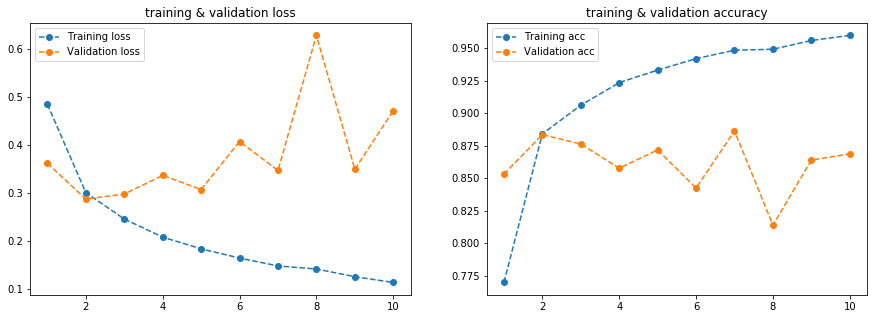

In [5]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
utility_obj.plot_training_history(history.history)

### result

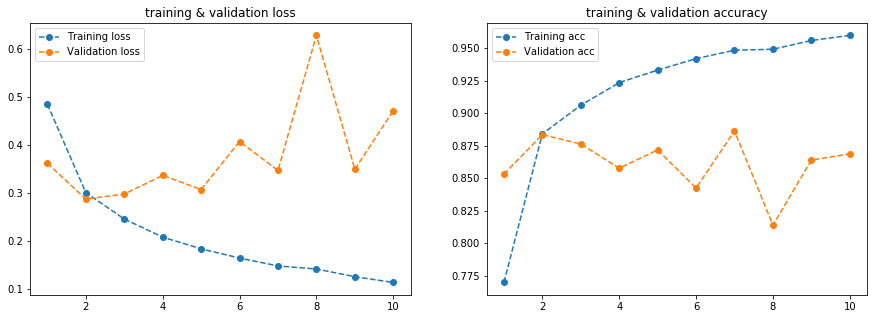

In [6]:
# ploting model training results
utility_obj.plot_training_history(history.history)


It performs slightly better than the regular LSTM we tried in the previous section, 
going above 89% validation accuracy. It also seems to overfit faster, which is unsurprising 
since a bidirectional layer has twice more parameters than a chronological LSTM.


### TRAINING A MODEL USING LSTM LAYER

In [4]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

print("\nStarted model training..")
history = model.fit(input_train, y_train,
                    epochs=10, verbose=0,
                    batch_size=128,
                    validation_split=0.2)
print("Model training complete !")

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________



Started model training..
Model training complete !


### result

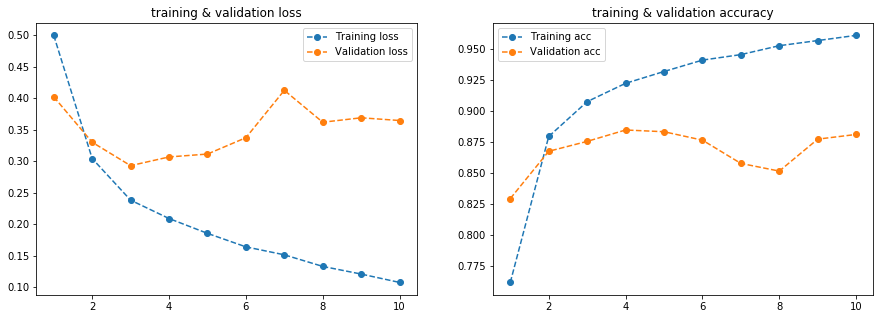

In [5]:
# ploting model training results
utility_obj.plot_training_history(history.history)

### UNDERSTANDING BIDIRECTIONAL RNNs

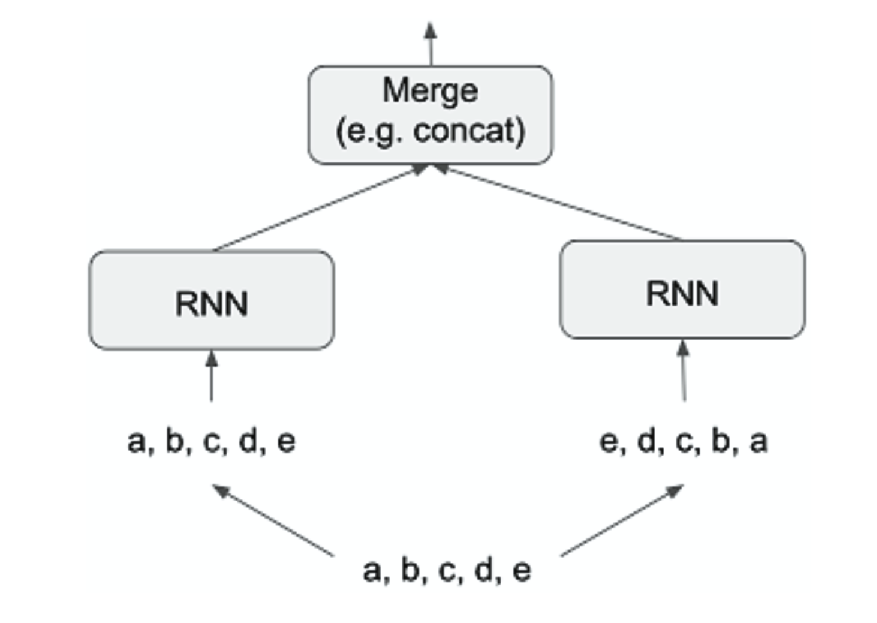

### reversing data for sequential model training


Undertanding the results, if the data is feed in reverse manner. 
Which is the second input in bi-directional RNN layer.

Data reversing
starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________



Started model training..
Model training complete !


In [6]:
utility_obj.plot_large_image_without_borders("./pics/bi-directional_rnn.png")
display(Markdown("### reversing data for sequential model training"))

print ("""
Undertanding the results, if the data is feed in reverse manner. 
Which is the second input in bi-directional RNN layer.
""")

print ("Data reversing")
# Reverse sequences
input_train_ = [x[::-1] for x in input_train]
input_test_ = [x[::-1] for x in input_test]

# Pad sequences
x_train_ = sequence.pad_sequences(input_train_, maxlen=maxlen)
x_test_ = sequence.pad_sequences(input_test_, maxlen=maxlen)

# model architecture and training
print("starting model training...")
model = Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.LSTM(64))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

print("\nStarted model training..")
history = model.fit(input_train, y_train,
                    epochs=10, verbose=0,
                    batch_size=128,
                    validation_split=0.2)
print("Model training complete !")

### result

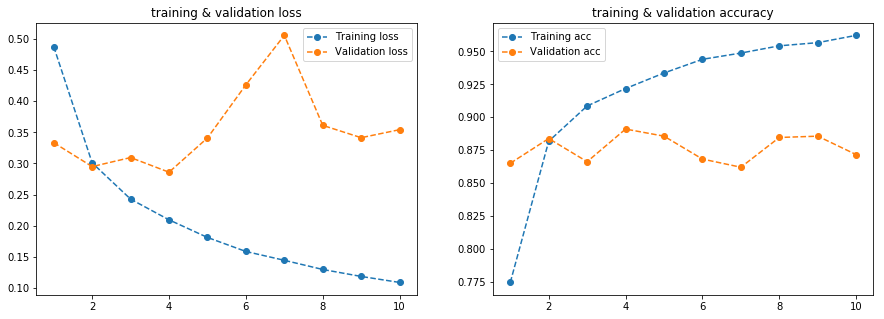

In [7]:
# ploting model training results
utility_obj.plot_training_history(history.history)

Thus, remarkably, on such a text dataset, reversed-order processing works 
just as well as chronological processing

### TRAINING AND EVALUATING A BIDIRECTIONAL LSTM

In [ ]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

print("\nStarted model training..")
history = model.fit(input_train, y_train,
                    epochs=10, verbose=0,
                    batch_size=128,
                    validation_split=0.2)
print("Model training complete !")


# ploting model training results
display(Markdown("### result"))
utility_obj.plot_training_history(history.history)

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 706,177
Trainable params: 706,177
Non-trainable params: 0
_________________________________________________________________



Started model training..


### result

In [ ]:
# ploting model training results
utility_obj.plot_training_history(history.history)


It performs slightly better than the regular LSTM we tried in the previous section, 
going above 89% validation accuracy. It also seems to overfit faster, which is unsurprising 
since a bidirectional layer has twice more parameters than a chronological LSTM.
